In [1]:
import networkx as nx
import retworkx as rx
import matplotlib.pyplot as plt
import random as rd
from conjugate_gradient import conjugate_gradient_opt,conjugate_gradient_back
from conjugate_gradient_euler import conjugate_gradient_euler
import sys
sys.path.append('\graph_immunization')
from network_generation import *
from vulnerability_meas import max_ev
import numpy as np
from tqdm import tqdm


In [2]:
N = 1000
G  = small_world(N)
#G = config_model(1000)

In [4]:
vacc_app= conjugate_gradient_opt(G,N,exact=False)

 67%|██████▋   | 667/1000 [00:23<00:15, 20.95it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: divide by zero encountered in true_divide
  return b_k,np.where(b_k!=0.,1/b_k/1000,0)
 84%|████████▍ | 840/1000 [00:31<00:05, 28.40it/s]\\home\wemaerem$\graph_immunization\gradient_optimization\conjugate_gradient.py:30: RuntimeWarning: overflow encountered in true_divide
  return b_k,np.where(b_k!=0.,1/b_k/1000,0)
100%|██████████| 1000/1000 [05:51<00:00,  2.85it/s]


In [ ]:
vacc_ex= conjugate_gradient_opt(G,N,exact=True)

In [3]:
vacc_eul = conjugate_gradient_euler(G,N)

100%|██████████| 1000/1000 [38:37<00:00,  2.32s/it] 


In [5]:
### conjugate_grad approx
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eig_app = [0]
cost = [0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vacc_app[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eig_app.append(eig_start-eig/n_calc)
    score+=eig/n_calc
    cost.append((i+1)/N)
print(score)

100%|██████████| 1000/1000 [00:13<00:00, 74.47it/s]

6376.908080140634


In [ ]:


### conjugate_grad exact
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eig_ex = [0]
cost = [0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vacc_ex[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eig_ex.append(eig_start-eig/n_calc)
    score+=eig/n_calc
    cost.append((i+1)/N)
print(score)

In [6]:
### conjugate_grad euler
Gr = rx.networkx_converter(G)
eig_start = max_ev(Gr)
eig_euler = [0]
cost = [0]
n_calc=20
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
score = 0
for i in tqdm(range(0,N)):
    node = vacc_eul[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eig_euler.append(eig_start-eig/n_calc)
    score+=eig/n_calc
    cost.append((i+1)/N)
print(score)

100%|██████████| 1000/1000 [00:11<00:00, 85.17it/s]

11954.597726034224


In [9]:
## vacc random
vaccinated_rd = list(range(N))
rd.shuffle(vaccinated_rd)
eigendrop_rd = [0]
A= rx.adjacency_matrix(Gr)
l_index = list(range(N))
n_calc=20
score=0
for i in tqdm(range(1,N)):
    node = vaccinated_rd[i]
    A = np.delete(A,l_index.index(node),0)
    A = np.delete(A,l_index.index(node),1)
    l_index.remove(node)
    eig=0
    for j in range(n_calc):
        eig += max_ev(A=A)
    eigendrop_rd.append(eig_start-eig/n_calc)
    score+=eig/n_calc
print(score)

100%|██████████| 999/999 [00:14<00:00, 69.67it/s] 

8325.706459655317


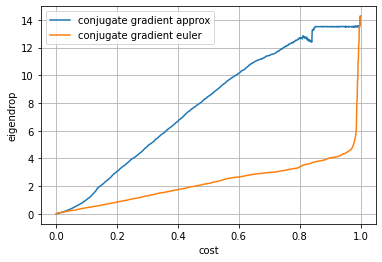

In [12]:
plt.figure(1)
#plt.plot(cost,eig_ex,label="conjugate gradient exact")
plt.plot(cost,eig_app,label="conjugate gradient approx")
plt.plot(cost,eig_euler,label="conjugate gradient euler")
#plt.plot(cost,eigendrop_rd,label="random")
plt.grid()
plt.xlabel('cost')
plt.ylabel("eigendrop")
plt.legend()
plt.show()